# KNN Algorithm

K Nearest Neighbours method uses the closest k observations to predict the output $\hat Y$. We are using Euclidean distance as a measure of closeness. After finding the k closest observations we take the average of each class of response and assign $\hat Y$ with the highest average. Below is the mathematical respresentation:  
$\hat Y(x) = \frac{1}{k} \Sigma_{x\in N_k(x)}    y_i$

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Import train and test data
train = pd.read_csv("train.txt", sep=',', header=None)
train.columns = ["X1", "X2", "Y"]
test = pd.read_csv("test.txt", sep=',', header=None)
test.columns = ["X1", "X2"]
train.head()

,X1,X2,Y
0,-0.216280,-1.20980,1
1,-0.832790,-2.76120,1
2,0.062666,0.86427,1
3,0.143840,-0.24230,1
4,-0.573240,-0.42599,1


In [9]:
# KNN Function that returns the predicted values for the test set given the training set
# Value of k can be specified
# Idea is to get the Euclidean distance of each point in the test dataset from the training set and then find k nearest points
def knn_classifier(train, test, k):

    pred = []
    for i in range(test.shape[0]):
        # create an array with the same number of observations as training dataset
        # It makes it easier for computation instead of using another for loop
        dup_df = np.tile([[test.iloc[i,0],test.iloc[i,1]]],test.shape[0]).reshape((test.shape[0],2))
        diff_sum = 0
        for j in range(len(test.columns)):
            # Subtract each column
            dup_df[:,j] = dup_df[:,j] - train.loc[:,train.columns[j]].values
        # Taking the sum of squares and square root
        dup_df = np.square(dup_df)
        dup_df = np.sum(dup_df, axis=1)
        dup_df = np.sqrt(dup_df)
        dup_df = pd.DataFrame(dup_df, columns=["val"])
        dup_df["Y"] = train.loc[:,"Y"]
        dup_df = dup_df.sort_values(by=['val']).reset_index() # sorting values
        # picking k points with least distance from the test point
        dup_df = dup_df.loc[0:k,:]
        # Check if the average is greater than 0.5 - works only for binary case
        # Change it if you need it for a multi class classification
        if(dup_df["Y"].sum()/dup_df.shape[0] >= 0.5):
            pred.append(1)
        else:
            pred.append(0)
    return(pred)
    

In [10]:
k = 15
predicted_output = knn_classifier(train, test, k)

In [11]:
# Lets check with sklearn package to see if we have predicted it right
from sklearn.neighbors import KNeighborsClassifier
X = train[["X1", "X2"]]
Y = train["Y"]
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, Y)
sklearn_pred = model.predict(test[["X1", "X2"]])

In [13]:
s = 0
for i in range(len(predicted_output)):
    if(predicted_output[i] == sklearn_pred[i]):
        s = s+1
s/test.shape[0]

0.985

We are 98.5% accurate to a widely used model. Please note that this is not the accuracy of the model but just a sanity  check to see if our algorithm is working or not. We are comparing our results with the results from the sklearn.neighbors.KNeighborsClassifier package. The purpose of this exercise is mainly to code the KNN algorithm and get familiar with it.|

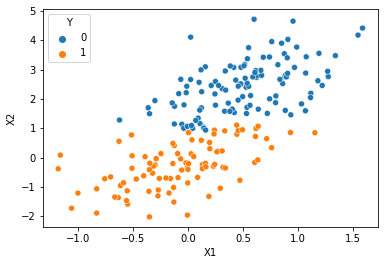

In [19]:
test["Y"] = predicted_output
sns.scatterplot(data = test, x = "X1", y="X2", hue="Y")
plt.show()